In [0]:
import skimage
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from skimage import io

%matplotlib inline

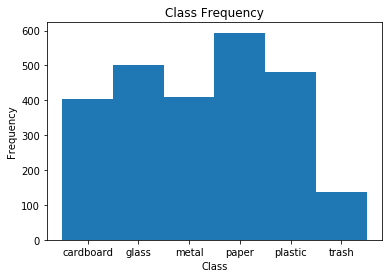

In [44]:
cardboard = io.imread_collection('data/cardboard/*.jpg')
glass = io.imread_collection('data/glass/*.jpg')
metal = io.imread_collection('data/metal/*.jpg')
paper = io.imread_collection('data/paper/*.jpg')
plastic = io.imread_collection('data/plastic/*.jpg')
trash = io.imread_collection('data/trash/*.jpg')
count = [len(cardboard), len(glass), len(metal), len(paper), len(plastic), len(trash)]
names = ['cardboard', 'glass', 'metal', 'paper', 'plastic', 'trash']
plt.bar(names, count, 1)
plt.title('Class Frequency')
plt.xlabel('Class')
plt.ylabel('Frequency')
plt.show()

So we can infer a class imbalance from this class frequency chart.

# **Raw Image and channel pixel values**

In [14]:
cardboard = io.imread('data/cardboard/cardboard1.jpg')
glass = io.imread('data/glass/glass1.jpg')
metal = io.imread('data/metal/metal1.jpg')
paper = io.imread('data/paper/paper1.jpg')
plastic = io.imread('data/plastic/plastic1.jpg')
trash = io.imread('data/trash/trash1.jpg')
df = pd.DataFrame(['cardboard', 'glass', 'metal', 'paper', 'plastic', 'trash'], columns=['Image'])

print(cardboard.shape, glass.shape, metal.shape, paper.shape, plastic.shape, trash.shape)

(384, 512, 3) (384, 512, 3) (384, 512, 3) (384, 512, 3) (384, 512, 3) (384, 512, 3)


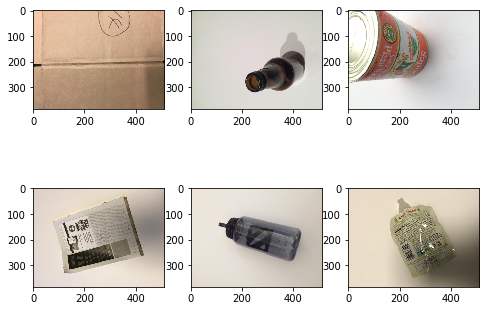

In [26]:
fig = plt.figure(figsize = (8,6))
ax1 = fig.add_subplot(2,3, 1)
ax1.imshow(cardboard)
ax2 = fig.add_subplot(2,3, 2)
ax2.imshow(glass)
ax3 = fig.add_subplot(2,3, 3)
ax3.imshow(metal)
ax4 = fig.add_subplot(2,3, 4)
ax4.imshow(paper)
ax5 = fig.add_subplot(2,3, 5)
ax5.imshow(plastic)
ax6 = fig.add_subplot(2,3, 6)
ax6.imshow(trash)

# **Grayscale image pixel values**

In [27]:
from skimage.color import rgb2gray

cgs = rgb2gray(cardboard)
ggs = rgb2gray(glass)
mgs = rgb2gray(metal)
pgs = rgb2gray(paper)
plgs = rgb2gray(plastic)
tgs = rgb2gray(trash)

print('Image shape:', cgs.shape, '\n')

# 2D pixel map
print('2D image pixel map')
print(np.round(cgs, 2), '\n')

# flattened pixel feature vector
print('Flattened pixel map:', (np.round(cgs.flatten(), 2)))

Image shape: (384, 512) 

2D image pixel map
[[0.81 0.81 0.81 ... 0.7  0.7  0.71]
 [0.81 0.82 0.82 ... 0.7  0.7  0.7 ]
 [0.82 0.82 0.82 ... 0.7  0.7  0.7 ]
 ...
 [0.6  0.6  0.61 ... 0.37 0.37 0.37]
 [0.6  0.6  0.6  ... 0.36 0.37 0.37]
 [0.61 0.6  0.59 ... 0.36 0.37 0.37]] 

Flattened pixel map: [0.81 0.81 0.81 ... 0.36 0.37 0.37]


# **Binning image intensity distribution**

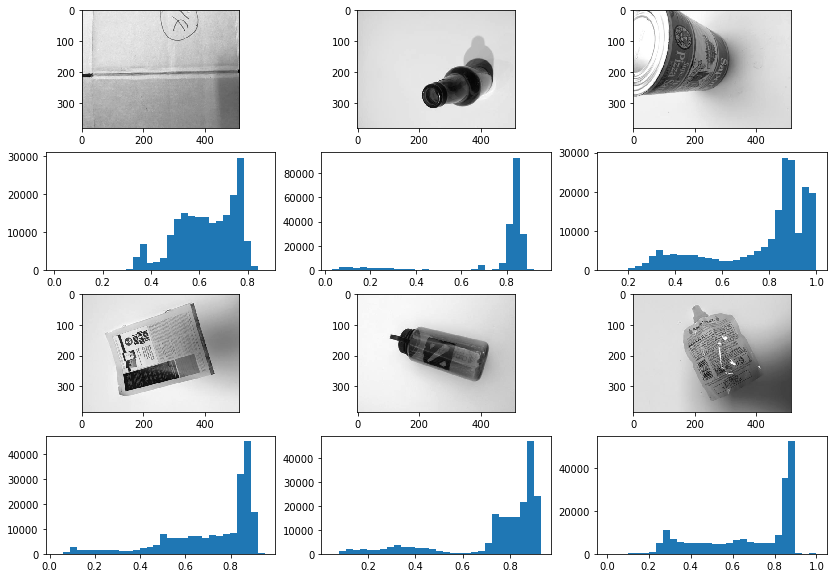

In [32]:
fig = plt.figure(figsize = (14,10))
ax1 = fig.add_subplot(4,3, 1)
ax1.imshow(cgs, cmap="gray")
ax2 = fig.add_subplot(4,3, 2)
ax2.imshow(ggs, cmap='gray')
ax3 = fig.add_subplot(4,3, 3)
ax3.imshow(mgs, cmap="gray")
ax4 = fig.add_subplot(4,3, 4)
c_freq, c_bins, c_patches = ax4.hist(cgs.flatten(), bins=30)
ax5 = fig.add_subplot(4,3, 5)
d_freq, d_bins, d_patches = ax5.hist(ggs.flatten(), bins=30)
ax6 = fig.add_subplot(4,3, 6)
d_freq, d_bins, d_patches = ax6.hist(mgs.flatten(), bins=30)

ax7 = fig.add_subplot(4,3, 7)
ax7.imshow(pgs, cmap="gray")
ax8 = fig.add_subplot(4,3, 8)
ax8.imshow(plgs, cmap='gray')
ax9 = fig.add_subplot(4,3, 9)
ax9.imshow(tgs, cmap="gray")
ax10 = fig.add_subplot(4,3, 10)
c_freq, c_bins, c_patches = ax10.hist(pgs.flatten(), bins=30)
ax11 = fig.add_subplot(4,3, 11)
d_freq, d_bins, d_patches = ax11.hist(plgs.flatten(), bins=30)
ax12 = fig.add_subplot(4,3, 12)
d_freq, d_bins, d_patches = ax12.hist(tgs.flatten(), bins=30)

# **Image aggregation statistics**

# **RGB ranges**

In [35]:
from scipy.stats import describe

cardboard_rgb = cardboard.reshape((384*512), 3).T
glass_rgb = glass.reshape((384*512), 3).T
metal_rgb = metal.reshape((384*512), 3).T
paper_rgb = paper.reshape((384*512), 3).T
plastic_rgb = plastic.reshape((384*512), 3).T
trash_rgb = trash.reshape((384*512), 3).T

cs = describe(cardboard_rgb, axis=1)
gs = describe(glass_rgb, axis=1)
ms = describe(metal_rgb, axis=1)
ps = describe(paper_rgb, axis=1)
pls = describe(plastic_rgb, axis=1)
ts = describe(trash_rgb, axis=1)

cardboard_rgb_range = cs.minmax[1] - cs.minmax[0]
glass_rgb_range = gs.minmax[1] - gs.minmax[0]
metal_rgb_range = ms.minmax[1] - ms.minmax[0]
paper_rgb_range = ps.minmax[1] - ps.minmax[0]
plastic_rgb_range = pls.minmax[1] - pls.minmax[0]
trash_rgb_range = ts.minmax[1] - ts.minmax[0]

rgb_range_df = pd.DataFrame([cardboard_rgb_range, glass_rgb_range, metal_rgb_range, paper_rgb_range, plastic_rgb_range, trash_rgb_range], 
                            columns=['R_range', 'G_range', 'B_range'])
pd.concat([df, rgb_range_df], axis=1)

,Image,R_range,G_range,B_range
0,cardboard,248,216,187
1,glass,243,236,237
2,metal,237,227,255
3,paper,241,236,232
4,plastic,232,226,219
5,trash,255,255,255


# **Descriptive aggregations**

In [36]:
cardboard_stats= np.array([np.round(cs.mean, 2),np.round(cs.variance, 2),
                     np.round(cs.kurtosis, 2),np.round(cs.skewness, 2),
                     np.round(np.median(cardboard_rgb, axis=1), 2)]).flatten()
glass_stats= np.array([np.round(gs.mean, 2),np.round(gs.variance, 2),
                        np.round(gs.kurtosis, 2),np.round(gs.skewness, 2),
                        np.round(np.median(glass_rgb, axis=1), 2)]).flatten()
metal_stats= np.array([np.round(ms.mean, 2),np.round(ms.variance, 2),
                     np.round(ms.kurtosis, 2),np.round(ms.skewness, 2),
                     np.round(np.median(metal_rgb, axis=1), 2)]).flatten()
paper_stats= np.array([np.round(ps.mean, 2),np.round(ps.variance, 2),
                        np.round(ps.kurtosis, 2),np.round(ps.skewness, 2),
                        np.round(np.median(paper_rgb, axis=1), 2)]).flatten()
plastic_stats= np.array([np.round(pls.mean, 2),np.round(pls.variance, 2),
                     np.round(pls.kurtosis, 2),np.round(pls.skewness, 2),
                     np.round(np.median(plastic_rgb, axis=1), 2)]).flatten()
trash_stats= np.array([np.round(ts.mean, 2),np.round(ts.variance, 2),
                        np.round(ts.kurtosis, 2),np.round(ts.skewness, 2),
                        np.round(np.median(trash_rgb, axis=1), 2)]).flatten()              


stats_df = pd.DataFrame([cardboard_stats, glass_stats, metal_stats, paper_stats, plastic_stats, trash_stats],
                        columns=['R_mean', 'G_mean', 'B_mean', 
                                 'R_var', 'G_var', 'B_var',
                                 'R_kurt', 'G_kurt', 'B_kurt',
                                 'R_skew', 'G_skew', 'B_skew',
                                 'R_med', 'G_med', 'B_med'])
pd.concat([df, stats_df], axis=1)

,Image,R_mean,G_mean,B_mean,R_var,G_var,B_var,R_kurt,G_kurt,B_kurt,R_skew,G_skew,B_skew,R_med,G_med,B_med
0,cardboard,189.00,155.50,126.72,1190.93,968.50,839.02,0.10,-0.22,-0.33,-0.70,-0.59,-0.54,193.0,158.0,129.0
1,glass,197.28,193.96,188.15,2534.76,2726.94,2629.13,4.70,4.45,4.25,-2.46,-2.45,-2.40,215.0,213.0,206.0
2,metal,203.45,197.00,191.46,1966.95,3068.14,3609.70,0.91,0.08,0.05,-1.21,-1.16,-1.19,218.0,221.0,219.0
3,paper,191.83,181.28,169.34,2771.53,2595.49,2612.37,1.20,1.17,1.18,-1.37,-1.35,-1.35,218.0,206.0,192.0
4,plastic,195.61,190.15,182.64,2987.84,2830.53,2324.52,1.67,1.62,1.73,-1.72,-1.68,-1.66,218.0,211.0,202.0
5,trash,182.30,171.77,150.70,3452.27,3113.04,3074.78,-0.98,-0.95,-1.13,-0.72,-0.74,-0.63,213.0,201.0,181.0


# **Edge detection**

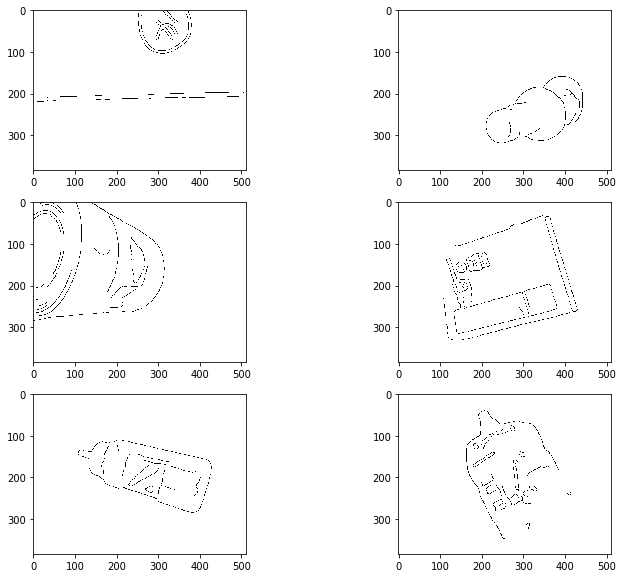

In [40]:
from skimage.feature import canny

cardboard_edges = canny(cgs, sigma=3)
glass_edges = canny(ggs, sigma=3)
metal_edges = canny(mgs, sigma=3)
paper_edges = canny(pgs, sigma=3)
plastic_edges = canny(plgs, sigma=3)
trash_edges = canny(tgs, sigma=3)

fig = plt.figure(figsize = (12,10))
ax1 = fig.add_subplot(3,2, 1)
ax1.imshow(cardboard_edges, cmap='binary')
ax2 = fig.add_subplot(3,2, 2)
ax2.imshow(glass_edges, cmap='binary')
ax3 = fig.add_subplot(3,2, 3)
ax3.imshow(metal_edges, cmap='binary')
ax4 = fig.add_subplot(3,2, 4)
ax4.imshow(paper_edges, cmap='binary')
ax5 = fig.add_subplot(3,2, 5)
ax5.imshow(plastic_edges, cmap='binary')
ax6 = fig.add_subplot(3,2, 6)
ax6.imshow(trash_edges, cmap='binary')